### Sales Prediction 
(Simple Linear Regression) 

**Name:** Lesly Jimenez Burriola

#### Import Libraries

In [1]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#### Import the Dataset

In [5]:
! pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement scikit-learn (from versions: none)
ERROR: No matching distribution found for scikit-learn


In [2]:
df = pd.read_csv("Salary_dataset.csv")

#### Data Inspection

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


#### Exploratory Data Analysis


##### Outlier Analysis

<Axes: ylabel='Salary'>

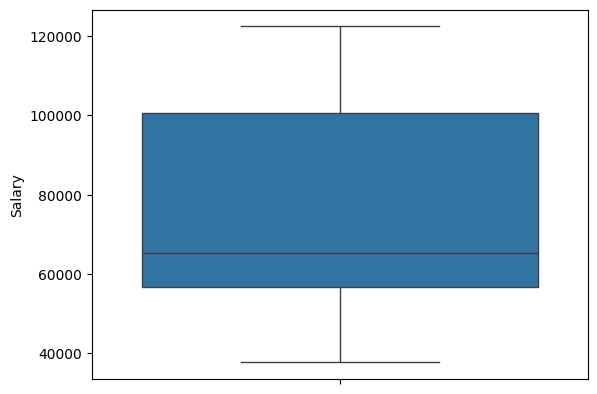

In [6]:
sns.boxplot(df["Salary"])

<Axes: ylabel='YearsExperience'>

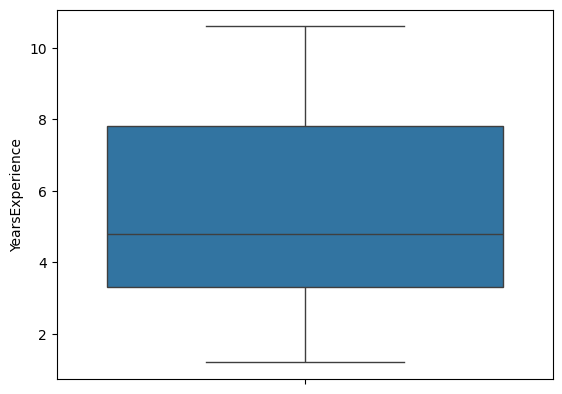

In [7]:
sns.boxplot(df["YearsExperience"])

##### Correlation Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

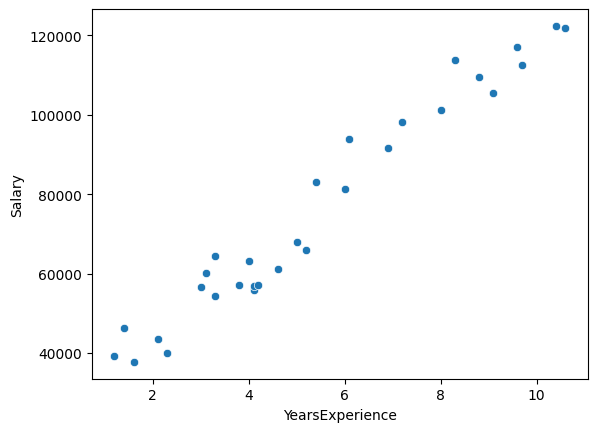

In [8]:
sns.scatterplot(df, x=(df["YearsExperience"]), y=(df["Salary"]))

#### Building the model

##### Separating predictor and target

In [9]:
#predeciremos los años en base al salario
X = df[["YearsExperience"]]
y = df[["Salary"]]

##### Train-Test split

In [10]:
# primera funcion de la libreria sklearn, le pasamos los valores de nuestro dataset, y "entrena" con valores que tdv no existen; primero proyectores que entrenaras, y despues los que ya tienes
# como se comporta nuestro modelo con datos que no se han creado
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
# lo entrena con el 70% que es el 0.7, y lo va probar con el 30% que es el 0.3

In [11]:
X_train.head()
X_train.shape

(21, 1)

In [12]:
y_train.shape

(21, 1)

##### Train the model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
# ya se entreno el modelo con esto

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Evaluate the model with training data

In [14]:
# se evaluara con los datos de entrenamiento
y_pred = model.predict(X_train)

In [15]:
mse = mean_squared_error(y_train, y_pred) #que tanto se diferencian de los valores reales
#le paso primero los valores de entrenamiento y despues los predecidos
r2 = r2_score(y_train, y_pred) #nos da el porcentaje 
print("MSE: ", mse)
print("R2: ", r2)

MSE:  24966824.967067916
R2:  0.9694981090661393


##### Evaluate the model with Test data

In [16]:
y_pred = model.predict(X_test)
y_pred

array([[ 33805.46838057],
       [ 54201.2278885 ],
       [ 74596.98739643],
       [ 81395.57389907],
       [ 44488.96145615],
       [ 60999.81439114],
       [ 52258.77460203],
       [110532.37319612],
       [ 80424.34725584]])

In [17]:
mse = mean_squared_error(y_test, y_pred) #Ahora con los valores de prueba
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  53206220.63015871
R2:  0.8848842951183192


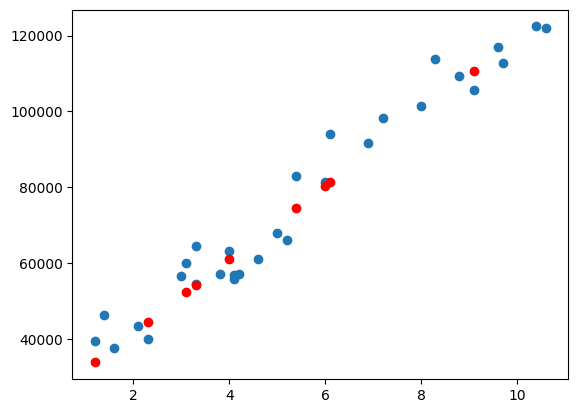

In [20]:
plt.scatter(X, y)
plt.scatter(X_test, y_pred, color="Red")